In [13]:
import numpy as np
import matplotlib.pyplot as plt

Ls = 2.83 * 10**6 #J/kg latent heat of sublimation
Lv = 2.5 * 10**6 #J/kg latent heat of vaporization
Rd = 287 #J/kg/K gas constant for dry air
Rv = 461 #J/kg/K gas constant for water vapor
rho_w = 1000 #kg/m^3 density of water
rho_i = 917 #kg/m^3 density of ice
Kelvin = 273.15 #K Kelvin temperature conversion
epsilon = Rd / Rv #ratio of gas constants
g = 9.81 #m/s^2 acceleration due to gravity
c_p = 1005 #J/kg/K specific heat of dry air at constant pressure



## Question 1
### a) What is the name, station ID, and elevation of your chosen site?  
        - Station Name: Joe Wright 
        - Station ID: 551
        - Elevation: 10,158 ft

### b) What is the current snow water equivalent estimate at the site (in inches)? How does this compare to the median SWE for the site on this day of the year during the 1991-2010 reference period (as % of median)?  

- Current SWE: 14.5 in, which is 86% of NRCS 1991-2020 Median

### c) What is the current snow depth (in inches)? 

- Current Snow depth: 52 in

### d) Calculate the current snow density. Show your equations and provide your answer in kg m-3.  


$$
\text{SWE} = \frac{\rho_{s}}{\rho_{w}} \cdot h_{s}
$$

$$
\rho_{s} = \frac{\text{SWE} \cdot \rho_{w}}{h_{s}}
$$

Given values:

$$
\rho_{s} = \left(14.5 \, \text{in} \times 0.0254 \, \frac{\text{m}}{\text{in}}\right) \times 1000 \, \frac{\text{kg}}{\text{m}^3} / \left(52 \, \text{in} \times 0.0254 \, \frac{\text{m}}{\text{in}}\right) 
$$

### $$ \rho_{s} = 278.8 \, \frac{\text{kg}}{\text{m}^3} $$


### e) Calculate the current snow porosity [dimensionless]. You can assume the snowpack is cold (T <0C). Show your equations.  


**Porosity of Snow:**

$$
\phi = \frac{V_a + V_w}{V_s} = \text{Snow Porosity}
$$

$$
\text{Since the snow pack is } < 0^\circ C, \quad V_w = \text{Volume of Water in snowpack} = 0
$$


$$
\phi = \frac{V_a}{V_s}
$$

**Density of Snow:**

$$
\rho_s = \frac{m_i + m_w}{V_s} = \frac{\rho_i \cdot V_i + \rho_w \cdot V_w}{V_s}
$$


$$
V_i/V_s = 1 - \frac{V_w + V_a}{V_s}
$$


$$
\rho_s = \rho_i \cdot (1- \phi) \quad \text{where} \quad \phi = 1 - \frac{\rho_s}{\rho_i}
$$

### $$ \phi = 1 - \frac{278.8 \, \text{kg/m}^3}{917 \, \text{kg/m}^3} = 0.700 $$


## Historical SWE:

### f. Make a graph showing a time series of daily SWE for each water year (you can plot each water year separately or as different lines on the same graph). 


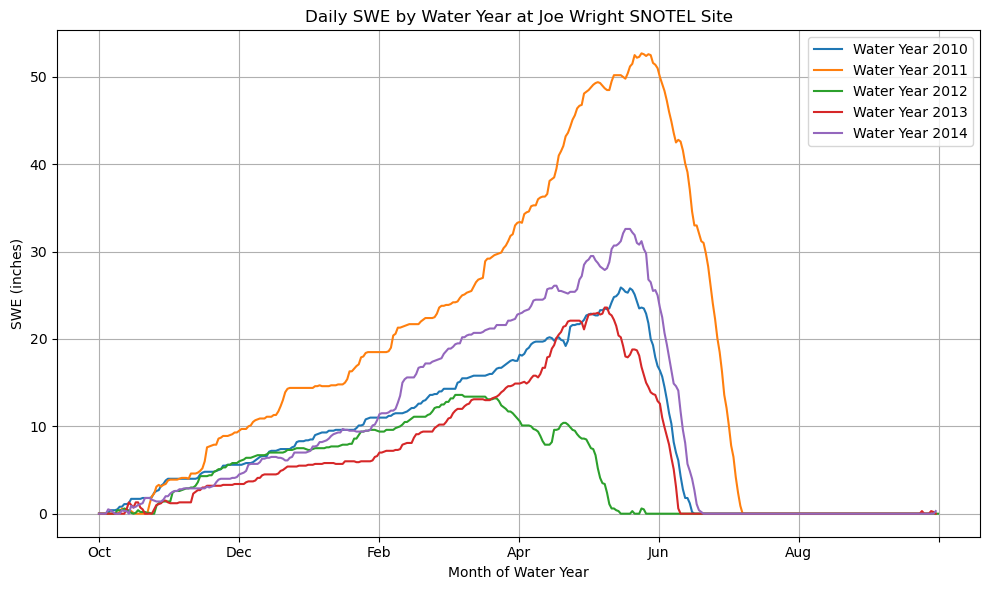

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

SWE_fn = SWE_fn = r"C:\Users\adunw\OneDrive - Colostate\Fort Collins\Courses\Spring 2024\CIVE 520\Homework\HW 3\Problem1_5yr_SWE.csv"
SWE_data = pd.read_csv(SWE_fn)

SWE_data['Date'] = pd.to_datetime(SWE_data['Date'], format='%m/%d/%Y') # Convert 'Date' column to datetime format

# Define a function to determine the water year
def get_water_year(date):
    if date.month >= 10:
        return date.year + 1
    else:
        return date.year

SWE_data['Water Year'] = SWE_data['Date'].apply(get_water_year) # Create a new column for 'Water Year'


fig, ax = plt.subplots(figsize=(10, 6))

# Group data by 'Water Year'
for year, group in SWE_data.groupby('Water Year'):
    # Create a reference date for the start of each water year
    start_of_water_year = pd.to_datetime(str(year-1) + '-10-01')
    
    # Calculate 'Day of Water Year' for each row in the group
    group = group.copy()  # To avoid SettingWithCopyWarning
    group['Day of Water Year'] = (group['Date'] - start_of_water_year).dt.days
    group['Month of Water Year'] = (group['Date'] - start_of_water_year).dt.days / 30.44
    # Plotting each group with a label for the water year
    ax.plot(group['Month of Water Year'], group['SWE (in)'], label=f'Water Year {year}')
    #Change to month of year
ax.set_xticks(np.arange(0, 12))  # Adjusted to align with the 'Month of Water Year' calculation
ax.set_xticklabels(['Oct', 'Nov', 'Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep'])

# This sets the major ticks on the x-axis to be spaced every 30 days (approximately monthly)
ax.xaxis.set_major_locator(plt.MaxNLocator(integer=True))

plt.title('Daily SWE by Water Year at Joe Wright SNOTEL Site')
plt.xlabel('Month of Water Year')
plt.ylabel('SWE (inches)')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

### g. For each water year, calculate the peak SWE value (in inches). Report the average and range (minimum and maximum) of annual peak SWE values.  

### h. For each water year, calculate the date on which the annual peak SWE occurred. Report the average and range (earliest and latest) dates of peak SWE. 




In [15]:
# g. For each water year, calculate the peak SWE value (in inches). Report the average and range (minimum and maximum) of annual peak SWE values.
print("==========================1g==========================")
peak_SWE = SWE_data.groupby('Water Year')['SWE (in)'].max()
max_peak_SWE = peak_SWE.max()
min_peak_SWE = peak_SWE.min()
avg_peak_SWE = peak_SWE.mean()

for year, SWE in peak_SWE.items():
    print(f'Peak SWE for Water Year {year}: {SWE} inches')
print(f'\nMaximum peak SWE: {max_peak_SWE} inches')
print(f'Minimum peak SWE: {min_peak_SWE} inches')
print(f'Average peak SWE: {avg_peak_SWE:.2f} inches\n')

print("==========================1h==========================")
peak_SWE_dates = SWE_data.loc[SWE_data.groupby('Water Year')['SWE (in)'].idxmax(), ['Water Year', 'Date']]
# Calculate the earliest and latest peak SWE dates, considering only the month and day and disregarding the year
earliest_peak_SWE = peak_SWE_dates['Date'].dt.dayofyear.min().round().astype(int)
latest_peak_SWE = peak_SWE_dates['Date'].dt.dayofyear.max().round().astype(int)
# Find earliest and latest peak SWE years 
earliest_peak_SWE_years = peak_SWE_dates.loc[peak_SWE_dates['Date'].dt.dayofyear == earliest_peak_SWE, 'Water Year']
latest_peak_SWE_years = peak_SWE_dates.loc[peak_SWE_dates['Date'].dt.dayofyear == latest_peak_SWE, 'Water Year']

for year, date in peak_SWE_dates.values:
    date = date.strftime('%m/%d/%Y')  # Format date as month/day/year
    print(f'Peak SWE date for Water Year {year}: {date}')

#print the earliest and latest peak SWE dates with year
print(f'\nEarliest peak SWE date: {pd.to_datetime(earliest_peak_SWE, format="%j").strftime("%m/%d")}/{earliest_peak_SWE_years.values[0]}')
print(f'Latest peak SWE date: {pd.to_datetime(latest_peak_SWE, format="%j").strftime("%m/%d")}/{latest_peak_SWE_years.values[0]}')

avg_peak_SWE_date = peak_SWE_dates['Date'].dt.dayofyear.mean().round().astype(int)
print(f'Average peak SWE date (month/day): {pd.to_datetime(avg_peak_SWE_date, format="%j").strftime("%m/%d")}')




==========================1g==========================
Peak SWE for Water Year 2010: 25.9 inches
Peak SWE for Water Year 2011: 52.7 inches
Peak SWE for Water Year 2012: 13.6 inches
Peak SWE for Water Year 2013: 23.6 inches
Peak SWE for Water Year 2014: 32.6 inches

Maximum peak SWE: 52.7 inches
Minimum peak SWE: 13.6 inches
Average peak SWE: 29.68 inches

==========================1h==========================
Peak SWE date for Water Year 2010: 05/16/2010
Peak SWE date for Water Year 2011: 05/25/2011
Peak SWE date for Water Year 2012: 03/04/2012
Peak SWE date for Water Year 2013: 05/09/2013
Peak SWE date for Water Year 2014: 05/18/2014

Earliest peak SWE date: 03/05/2012
Latest peak SWE date: 05/25/2011
Average peak SWE date (month/day): 05/02


### i. In the Western US, April 1 is considered the approximate peak snowpack date, and estimates of SWE on this date are used to make forecasts of water availability for the coming season. Is April 1 SWE a good estimate of annual peak SWE at your chosen site?  
 
 No it is not - the average date of peak snowpack at my site for the water years 2010 - 2014 is May 2, with a range of peak dates from March 5 to May 25. Based on the years where I pulled data from the SNOTEL station, an estimate of peak SWE on April 1 would underpredict water availability for the coming season. 

## Spatial Variability and Measurement Uncertainty:  
### j. Snotel stations use snow pillows to measure SWE at a point location, usually 3m x 3m. Explain why SWE measurements over such a small area may not be representative of an entire watershed by discussing how i) vegetation, ii) elevation, and iii) aspect can each affect SWE at different locations.  

## Problem 2

In [26]:
T_snow = -12 #deg C
d_snow = 2.2 #m, depth of snow
porosity_snow = 0.68 #porosity of snow
Lf = 3.34 * 10**5 #J/kg latent heat of fusion
rho_snow = rho_i * (1 - porosity_snow) #kg/m^3 density of snow
#theta_ret = (max Volume of water in snow)/ Volume of snowpack)
theta_ret = -0.0735 * (rho_snow/rho_w) + 2.67 * 10**-4 * (rho_snow**2/rho_w) 
ci = 2102 #J/kg/K specific heat of ice
SWE = rho_snow * d_snow / rho_w #m, snow water equivalent

# Calculate the amount of energy required in J/m2 to complete each phase of the snowmelt season 
# (warming, ripening, and melt output).  

Q_warming = ci * rho_i * d_snow * (T_snow - 0) #J/m^2
Q_ripening = d_snow * theta_ret * rho_w * Lf #J/m^2
Q_melt = SWE - theta_ret * Ls

print(f'Energy required for warming: {Q_warming:.2e} J/m^2')
print(f'Energy required for ripening: {Q_ripening:.2e} J/m^2')
print(f'Energy required for melt: {Q_melt:.2e} J/m^2')


Energy required for warming: -5.09e+07 J/m^2
Energy required for ripening: -1.60e+07 J/m^2
Energy required for melt: 6.16e+04 J/m^2


## Problem 3

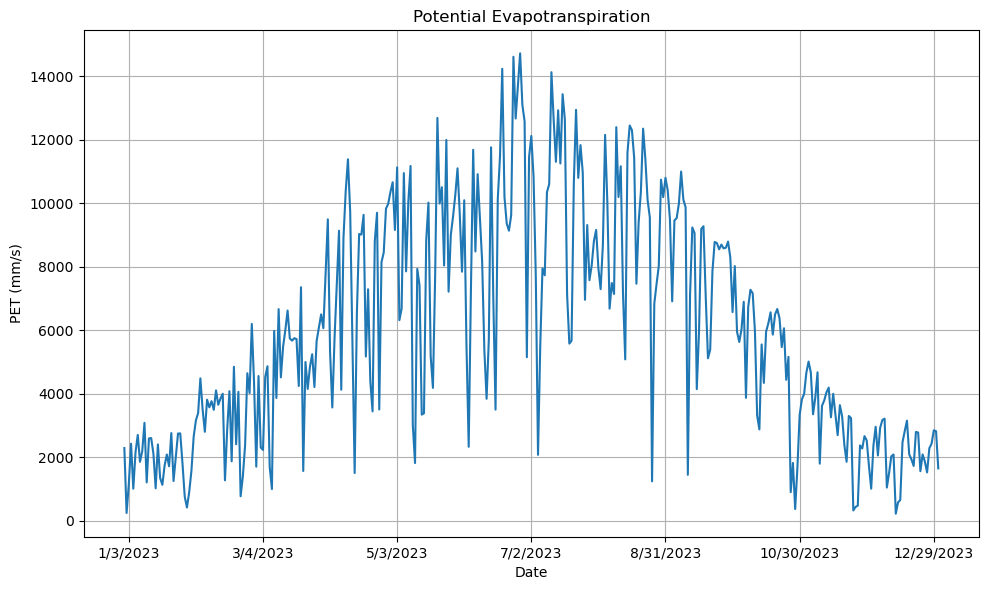

In [17]:
Patm = 85000 #Pa
epsilon = Rd / Rv #ratio of gas constants
zh = 0.05 #m, characteristic roughness height
zd = 0.7 * zh #m, zero plane displacement height
z0 = 0.1 * zh #m, aerodynamic roughness length
zm = 2 #m, measurement height
G = 0 #W/m2, ground heat flux
forcing_data_fn = r"C:\Users\adunw\OneDrive - Colostate\Fort Collins\Courses\Spring 2024\CIVE 520\Homework\HW 3\HW3_ET_data.csv"
forcing_data = pd.read_csv(forcing_data_fn)
#Column names: Station	Date	Avg Temp ©	Vapor Pressure (Pa)	Wind Speed (m/s)	Net Radiation (Wm-2)

def calc_psy_const(P, LH):
    """
    Calculate psychrometric constant
    c_p: specific heat of dry air at constant pressure in kJ/kg/K
    P: pressure in kPa
    LH: latent heat of vaporization in MJ/kg
    return: psychrometric constant in kPa/°C
    """
    return c_p * P / (epsilon * LH)

def calc_e_sat(T):
    """
    Calculate saturation vapor pressure
    T: temperature in °K
    Lv: latent heat of vaporization in J/kg
    Rv: gas constant for water vapor in J/kg/K
    return: saturation vapor pressure in Pa
    """
    L_term = np.where(T > 273.15, Lv, Ls)
    return 611 * np.exp((L_term / Rv) * (1 / 273.15 - 1 / T))

def calc_delta(T):
    """
    Calculate slope of the saturation vapor pressure curve
    T: temperature in °C
    Lv: latent heat of vaporization in J/kg
    Rv: gas constant for water vapor in J/kg/K
    return: slope of the saturation vapor pressure curve in Pa/°K
    """
    return (Lv * calc_e_sat(T + Kelvin)) / (Rv * (T + Kelvin)**2) 

def calc_ra(um, z, zd, z0):
    """
    Calculate aerodynamic resistance using constants from Environmentalcrop_constants.
    (TH Eq 22.9)
    :param z: Reference height (m).
    :param zd: Displacement height (m).
    :param z0: Roughness length (m).
    :param um: Wind speed at measurement height (m s-1).
    :param k: von Karman's constant (none). Environmental constant.
    :return: Aerodynamic resistance (s m-1).
    """
    k = 0.4  # von Karman's constant
    return 1 / (k**2 * um) * np.log((z - zd) / z0)**2 

def calc_qs(T, P):
    """
    Calculate saturation specific humidity
    T: temperature in °C
    P: pressure in Pa
    return: saturation specific humidity in kg/kg
    """
    return epsilon * calc_e_sat(T + Kelvin) / P

def calc_q(e, P):
    """
    Calculate specific humidity
    e: vapor pressure in Pa
    P: pressure in Pa
    return: specific humidity in kg/kg
    """
    return epsilon * e / (P - (1 - epsilon) * e)

def calc_rho_a(P, e, T):
    """
    Calculate moist air density
    P: pressure in Pa
    ea: vapor pressure in Pa
    T: temperature in °C
    return: air density in kg/m3
    """
    rho_a = P / (Rd * (T + Kelvin)) + e / (Rv * (T + Kelvin))
    return rho_a

def calc_PET(delta, gamma, Rn, G, rho_a, dq, ra):
    """
    Calculate potential evapotranspiration
    delta: slope of the saturation vapor pressure curve in Pa/°K
    gamma: psychrometric constant in kPa/°C
    Rn: net radiation in W/m2
    G: soil heat flux in W/m2
    rho_a: air density in kg/m3
    dq: vapor pressure deficit in Pa
    ra: aerodynamic resistance in s/m
    return: potential evapotranspiration in mm/s
    """
    return (delta * (Rn - G) + (rho_a * Lv * dq) / ra) / (1 + delta / gamma)

Rn = forcing_data['Net Radiation (Wm-2)'] #W/m2
T = forcing_data['Avg Temp (deg C)'] #°C
e = forcing_data['Vapor Pressure (Pa)'] #Pa
um = forcing_data['Wind Speed (m/s)'] #m/s

forcing_data['ra'] = calc_ra(um, zm, zd, z0)
forcing_data['delta'] = calc_delta(T)
forcing_data['gamma'] = calc_psy_const(Patm , Lv)
forcing_data['qs'] = calc_qs(T, Patm)
forcing_data['q'] = calc_q(e, Patm)
forcing_data['dq'] = forcing_data['qs'] - forcing_data['q']
forcing_data['rho_a'] = calc_rho_a(Patm, e, T)
forcing_data['PET'] = calc_PET(forcing_data['delta'], forcing_data['gamma'], Rn, G, forcing_data['rho_a'], forcing_data['dq'], forcing_data['ra'])

#Plot the potential evapotranspiration
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(forcing_data['Date'], forcing_data['PET'])
ax.set_title('Potential Evapotranspiration')
ax.set_xlabel('Date')
ax.set_ylabel('PET (mm/s)')
#Only show every 30 days ON X AXIS
ax.xaxis.set_major_locator(mdates.DayLocator(interval=60))
ax.grid(True)
plt.tight_layout()
plt.show()

## Problem 4

In [23]:

P = 1011 * 100 #Pa atmospheric pressure
Ta = 22.3 #deg C
RH = 0.68 #relative humidity
V = 1.85 #m/s wind speed at 2m
Tsurf = 24.5 #deg C surface temperature
SW_in = 15 #MJ/m2/day incoming shortwave radiation
albedo = 0.06 #albedo
LW_in = 24.2 #MJ/m2/day incoming longwave radiation
sigma = 5.67 * 10**-8 #W/m2/K4 Stefan-Boltzmann constant
G = 0 #W/m2, ground heat flux

ea = calc_e_sat(Ta + Kelvin) * RH
esurf = calc_e_sat(Tsurf + Kelvin) * RH
qa = calc_q(ea, P)
qsurf = calc_q(esurf, P)

#convert from MJ/day to W
SW_in = SW_in * 10**6 / (24 * 3600) #W/m2
LW_in = LW_in * 10**6 / (24 * 3600) #W/m2

B = c_p / Lv * (Ta - Tsurf) / (qa - qsurf)

Rn = SW_in * (1 - albedo) + LW_in - sigma * (Tsurf + Kelvin)**4 #W/m2
LE = (Rn - G) / (1 + B) #W/m2
H = B * LE #W/m2


print(f"Specific humidity at air temperature: {qa:.4f}")
print(f"Specific humidity at surface temperature: {qsurf:.4f}")
print(f"Incoming Shortwave radiation: {SW_in:.2f} W/m2")
print(f"Incoming Longwave radiation: {LW_in:.2f} W/m2")
print (f"Net radiation: {Rn:.2f} W/m2")

print("\n==========================Problem 4==========================")
print(f"Bowen ratio: {B:.2f}")
print(f"Sensible heat flux: {H:.2f} W/m2")
print(f"Latent heat flux: {LE:.2f} W/m2")

Specific humidity at air temperature: 0.0115
Specific humidity at surface temperature: 0.0132
Shortwave radiation: 173.61 W/m2
Longwave radiation: 280.09 W/m2
Net radiation: -1.76 W/m2

==========================Problem 4==========================
Bowen ratio: 0.52
Sensible heat flux: -0.61 W/m2
Latent heat flux: -1.16 W/m2
